# 1 Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score
import joblib

# 2 Data

In [2]:
df= pd.read_csv("auto-mpg.csv")
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


## 2.1 Brief Explanation of the Data:

MPG (Miles Per Gallon): This is the target variable or dependent variable. It represents the fuel efficiency of the car in miles per gallon, which is a measure of how many miles the car can travel per gallon of fuel.

Cylinders: The number of cylinders in the car's engine. It can be a categorical variable, typically taking values like 3, 4, 6, or 8.

Displacement: This is the engine displacement, typically measured in cubic inches (CID). It's a measure of the engine's size or volume.

Horsepower: The power of the car's engine, typically measured in horsepower (HP).

Weight: The weight of the car in pounds (lbs).

Acceleration: The time it takes for the car to accelerate from 0 to 60 miles per hour (mph), measured in seconds.

Model Year: The year when the car model was manufactured, represented as a two-digit or four-digit year.

Origin: The origin or manufacturing country of the car. It's often a categorical variable, with values like 1 for USA, 2 for Europe, and 3 for Asia.

Car Name: The name or label of the car model. This column may contain various text information, which is typically not used in modeling and can be considered as an identifier.

# 3. Basic Data Overview

In [3]:
df.shape

(398, 9)

In [4]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

In [5]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [7]:
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce', downcast='float')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float32
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float32(1), float64(3), int64(4), object(1)
memory usage: 26.6+ KB


# 4. Imputing missing values 

In [9]:
imputer = SimpleImputer(strategy='mean')
# Apply the imputer to the 'horsepower' column
df['horsepower'] = imputer.fit_transform(df['horsepower'].values.reshape(-1, 1))


In [10]:
df["car name"].value_counts()

car name
ford pinto             6
toyota corolla         5
amc matador            5
ford maverick          5
chevrolet chevette     4
                      ..
chevrolet monza 2+2    1
ford mustang ii        1
pontiac astro          1
amc pacer              1
chevy s-10             1
Name: count, Length: 305, dtype: int64

In [11]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger


# 5. Basic Data Visualization

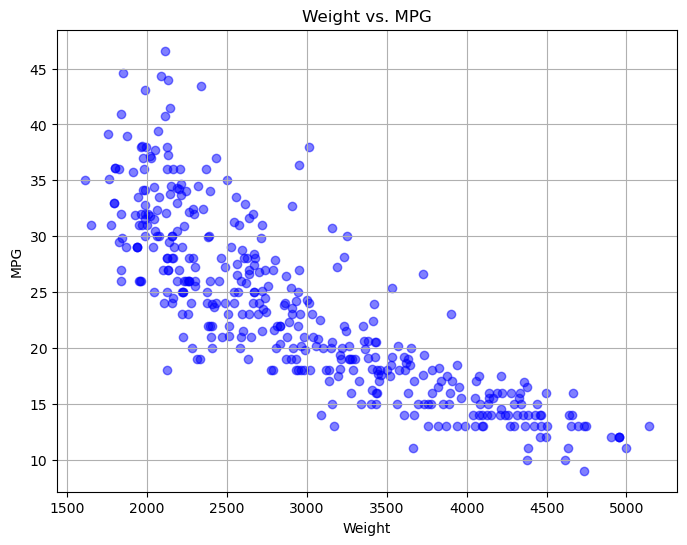

In [12]:
plt.figure(figsize=(8, 6))
plt.scatter(df['weight'], df['mpg'], c='blue', alpha=0.5)

# Add labels and a title
plt.xlabel('Weight')
plt.ylabel('MPG')
plt.title('Weight vs. MPG')
# Display the plot
plt.grid(True)
plt.show()

# 6.Data Splitting

In [13]:
df['weight']

0      3504
1      3693
2      3436
3      3433
4      3449
       ... 
393    2790
394    2130
395    2295
396    2625
397    2720
Name: weight, Length: 398, dtype: int64

In [14]:
X = df.drop(['mpg','car name'], axis=1)
Y = df['mpg']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

# 7.Linear Regression Model Training and Evaluation

In [16]:

models = [
    LinearRegression(),
    Ridge(),
    Lasso(),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    DecisionTreeRegressor(),
    SVR(),
   
]

best_model = None
best_r2 = -1

for model in models:

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    print(f"Model: {type(model).__name__}, R-squared: {r2}")

    if r2 > best_r2:
        best_r2 = r2
        best_model = model


if best_model is not None:
    model_name = type(best_model).__name__  
    joblib.dump(best_model, f'{model_name}_best_model.sav')
    print(f"Best Model: {model_name}, R-squared: {best_r2}")
else:
    print("No models were trained.")


Model: LinearRegression, R-squared: 0.8475731044869619
Model: Ridge, R-squared: 0.8474762928949494
Model: Lasso, R-squared: 0.8305263561639906
Model: RandomForestRegressor, R-squared: 0.9135220211119133
Model: GradientBoostingRegressor, R-squared: 0.9017474171823837
Model: DecisionTreeRegressor, R-squared: 0.783066366556929
Model: SVR, R-squared: 0.7445375624533209
Best Model: RandomForestRegressor, R-squared: 0.9135220211119133


In [17]:
from sklearn.metrics import r2_score

models = {}
r2_scores = {}

for feature in X.columns:
    model = LinearRegression()
    model.fit(X_train[[feature]], y_train)
    models[feature] = model

    # Make predictions on the test data
    y_pred = model.predict(X_test[[feature]])

    # Calculate R-squared for the model
    r2 = r2_score(y_test, y_pred)
    r2_scores[feature] = r2

    # Print the regression line and R-squared for each feature
    coef = model.coef_[0]
    intercept = model.intercept_
    print(f"Regression Line for {feature}:")
    print(f"MPG = {coef} * {feature} + {intercept}")
    print(f"R-squared: {r2}")
    print()

# Print R-squared scores for all features
print("R-squared scores for all features:")
for feature, r2 in r2_scores.items():
    print(f"{feature}: {r2}")


Regression Line for cylinders:
MPG = -3.6263332785917197 * cylinders + 43.302130729961945
R-squared: 0.6342539549673285

Regression Line for displacement:
MPG = -0.061725205001093006 * displacement + 35.45349527608239
R-squared: 0.6633114869465596

Regression Line for horsepower:
MPG = -0.16340254247188568 * horsepower + 40.48814392089844
R-squared: 0.6438073586734412

Regression Line for weight:
MPG = -0.0078052423515948795 * weight + 46.78206336645047
R-squared: 0.722971057303075

Regression Line for acceleration:
MPG = 1.1195881140605575 * acceleration + 6.09788841106861
R-squared: 0.28376927103543026

Regression Line for model year:
MPG = 1.2914184723931863 * model year + -74.67364292574686
R-squared: 0.28727386919989206

Regression Line for origin:
MPG = 5.497886051553848 * origin + 14.859967477716205
R-squared: 0.3191360882461206

R-squared scores for all features:
cylinders: 0.6342539549673285
displacement: 0.6633114869465596
horsepower: 0.6438073586734412
weight: 0.722971057303

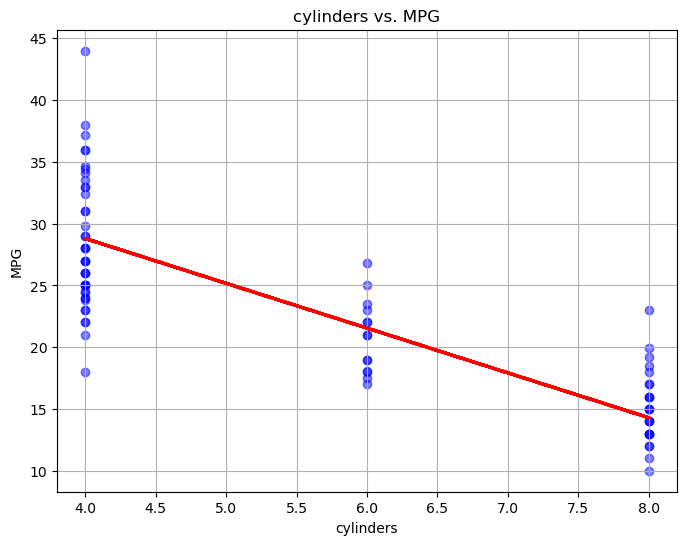

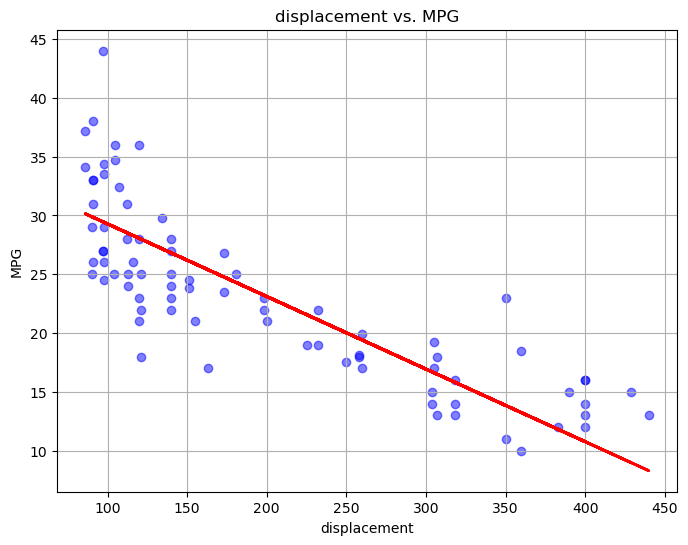

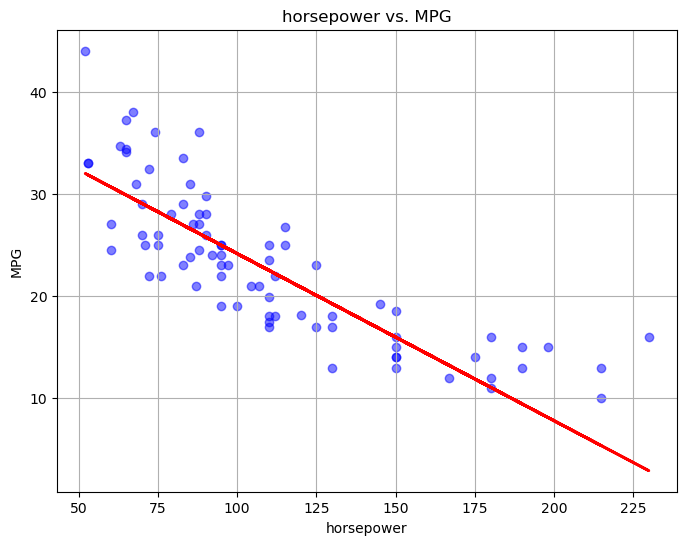

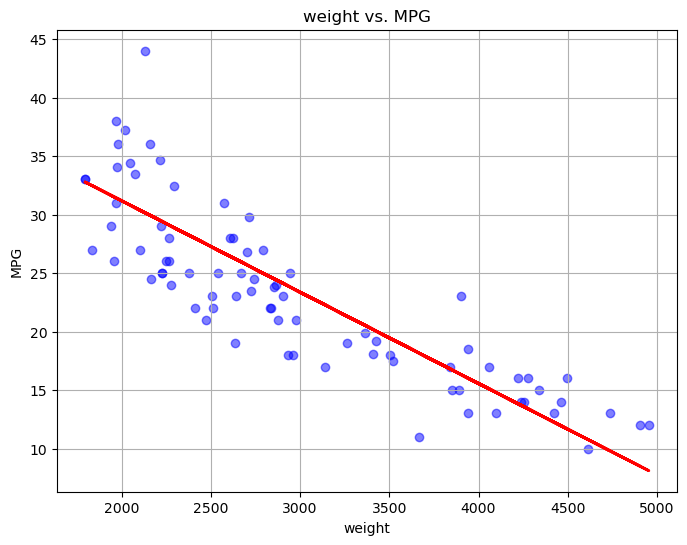

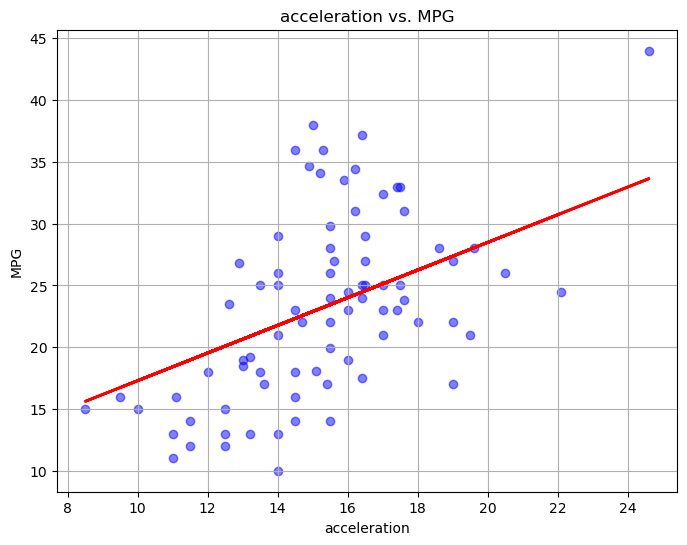

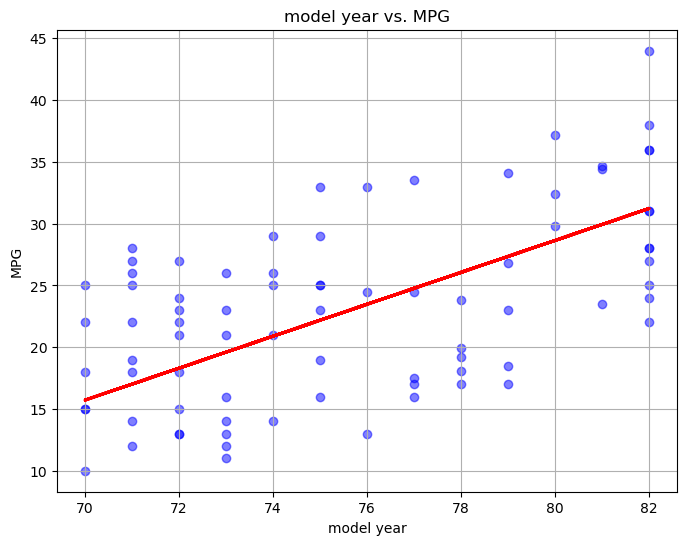

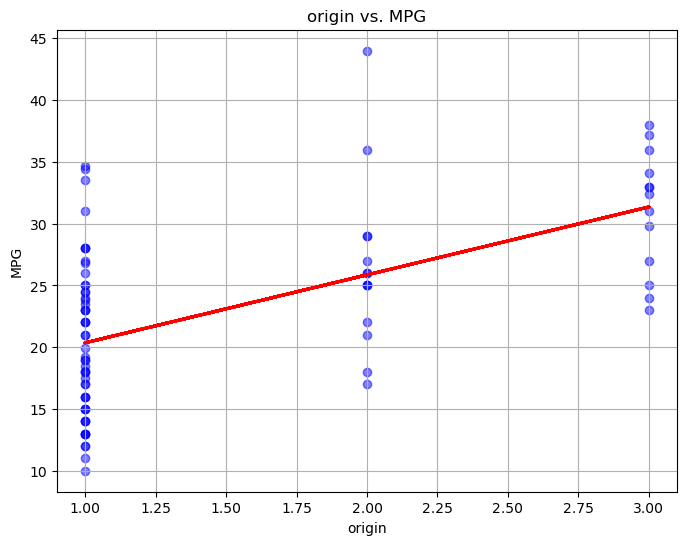

In [18]:
models = {}
for feature in X.columns:
    model = LinearRegression()
    model.fit(X_train[[feature]], y_train)
    models[feature] = model

# Create scatter plots with regression lines for each feature
for feature, model in models.items():
    plt.figure(figsize=(8, 6))
    plt.scatter(X_test[feature], y_test, c='blue', alpha=0.5)
    plt.plot(X_test[feature], model.predict(X_test[[feature]]), color='red', linewidth=2)
    plt.xlabel(feature)
    plt.ylabel('MPG')
    plt.title('{} vs. MPG'.format(feature))
    plt.grid(True)
    plt.show()